##### **Perfect Code**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

#**Loading the Dataset**

#####First we load the dataset and find out the number of columns, rows, null values, etc

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89353 entries, 0 to 89352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         89353 non-null  int64  
 1   key                89353 non-null  object 
 2   fare_amount        89353 non-null  float64
 3   pickup_datetime    89353 non-null  object 
 4   pickup_longitude   89353 non-null  float64
 5   pickup_latitude    89352 non-null  float64
 6   dropoff_longitude  89351 non-null  float64
 7   dropoff_latitude   89351 non-null  float64
 8   passenger_count    89352 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.1+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8.935300e+04,89353.000000,89353.000000,89352.000000,89351.000000,89351.000000,89352.000000
mean,2.771803e+07,11.387451,-72.538401,39.946244,-72.571011,39.936032,1.674792
std,1.600435e+07,9.916748,11.704086,8.352747,15.273303,6.746573,1.296590
min,4.800000e+01,-49.570000,-1340.648410,-74.015515,-3356.666300,-74.009465,0.000000
25%,1.385031e+07,6.000000,-73.992018,40.734827,-73.991417,40.733678,1.000000
50%,2.776538e+07,8.500000,-73.981783,40.752648,-73.980108,40.752968,1.000000
75%,4.152966e+07,12.500000,-73.967187,40.767184,-73.963768,40.768097,2.000000
max,5.542169e+07,350.000000,40.808425,1644.421482,40.828672,872.697628,6.000000


##**Cleaning**

In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    2
dropoff_latitude     2
passenger_count      1
dtype: int64

##Remove null rows

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.dtypes #Checking Datatypes.

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

###Fix data type of pickup_datetime from Object to DateTime

In [11]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

##**Outliers**

In [12]:

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin

    return c

In [13]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475450


### **Outlier**

###### we can get rid of the trips with very large distances that are outliers as well as trips with 0 distance

Text(0, 0.5, 'fare_amount')

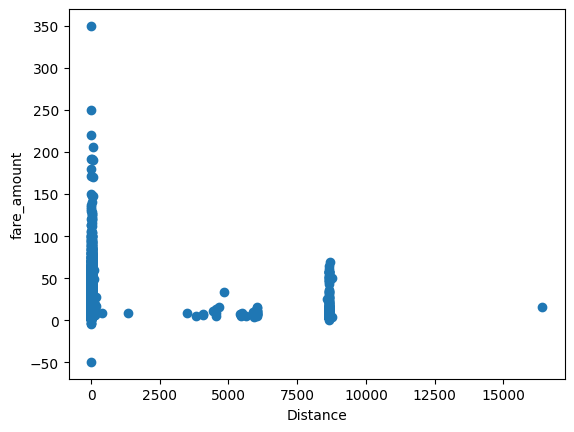

In [15]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

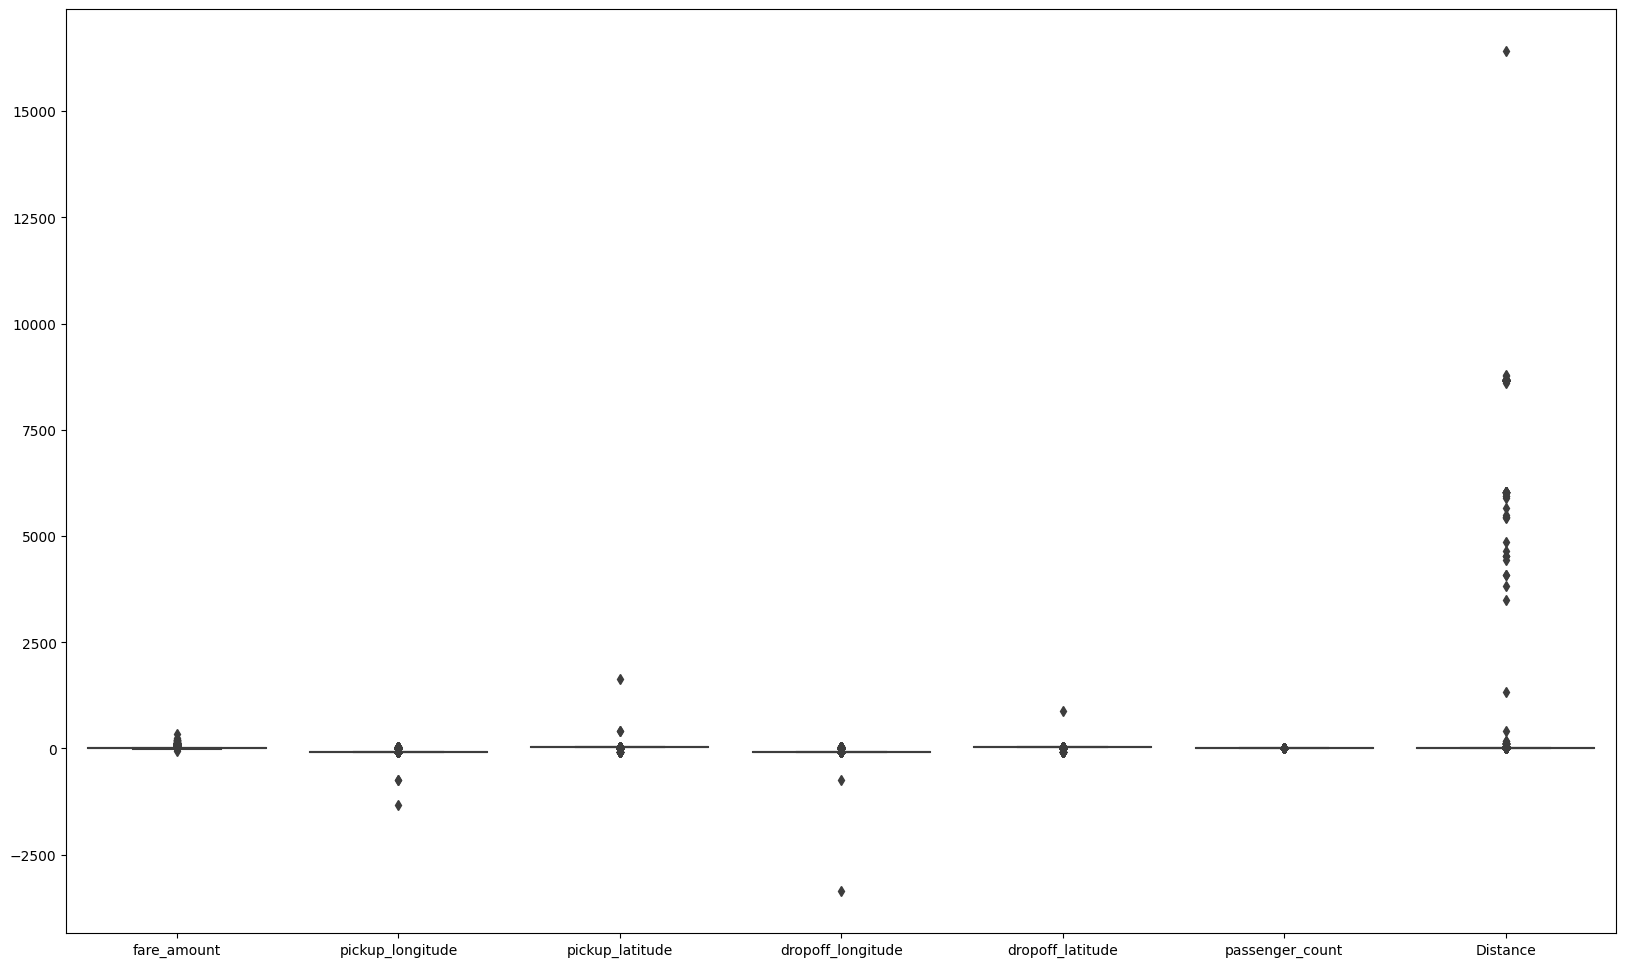

In [16]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

Text(0, 0.5, 'fare_amount')

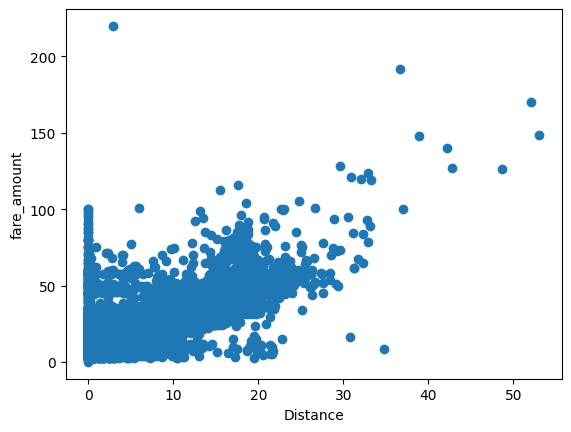

In [17]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

### **Correlation Matrix**

##### To find to variables that have the most inter-dependence

In [18]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

<ipython-input-18-a30339eb0752>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.013000,-0.012626,0.012630,-0.012600,0.007378,0.856836
pickup_longitude,0.013000,1.000000,-0.961415,0.999992,-0.980426,0.002623,-0.115968
pickup_latitude,-0.012626,-0.961415,1.000000,-0.961417,0.980583,-0.004407,0.111426
dropoff_longitude,0.012630,0.999992,-0.961417,1.000000,-0.980426,0.002627,-0.116201
dropoff_latitude,-0.012600,-0.980426,0.980583,-0.980426,1.000000,-0.004132,0.108063
passenger_count,0.007378,0.002623,-0.004407,0.002627,-0.004132,1.000000,0.004167
Distance,0.856836,-0.115968,0.111426,-0.116201,0.108063,0.004167,1.000000


### **Standardization**

##### For more accurate results on our linear regression model

In [20]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

[[-0.39962371]
 [-0.37886439]
 [ 0.1608779 ]
 ...
 [-0.58645758]
 [-0.62797622]
 [-0.08823393]]
[[-0.43810617]
 [-0.22327866]
 [ 0.49222952]
 ...
 [-0.50344926]
 [-0.54681286]
 [-0.01567781]]


### **Simple Linear regression**

##### Training the simple linear regression model in the training set

In [23]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))


Training set score: 0.74
Test set score: 0.7121509


In [24]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
14659,-0.254308,0.004877
737,-0.347725,-0.268805
2716,-0.399624,-0.572226
5241,-0.399624,-0.271634
1372,-0.794051,-0.619228
14795,-0.627976,-0.542187
8288,0.845935,0.373936
17263,0.326952,0.263423
143,1.832003,1.619433
15555,-0.794051,-0.607322


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.2688319980473103
Mean Absolute % Error: 1.486868094432629
Mean Squared Error: 0.29294149194855795
Root Mean Squared Error: 0.5412406968702168
R Squared (R²): 0.8438903188970259


### **Random Forest Regressor**

##### Training the RandomForestRegressor model on the training set

In [26]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-26-23bf85fdec00>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [27]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
6792,-0.295827,-0.380837
15315,0.482647,0.499566
6953,-0.503420,-0.374920
2868,-0.752532,-0.699803
13910,-0.254308,-0.487851
6241,0.171258,1.801528
16054,-0.669495,-0.626419
12708,-0.140132,-0.170752
2783,0.451508,0.646023
11177,-0.326966,-0.086885


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))


Mean Absolute Error: 0.30668367770368754
Mean Absolute % Error: 1.662898917718992
Mean Squared Error: 0.3363309914144848
Root Mean Squared Error: 0.5799405067888298
R Squared (R²): 0.8182393502379268
